In [1]:
import electrostatics as elec
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = (12, 8)

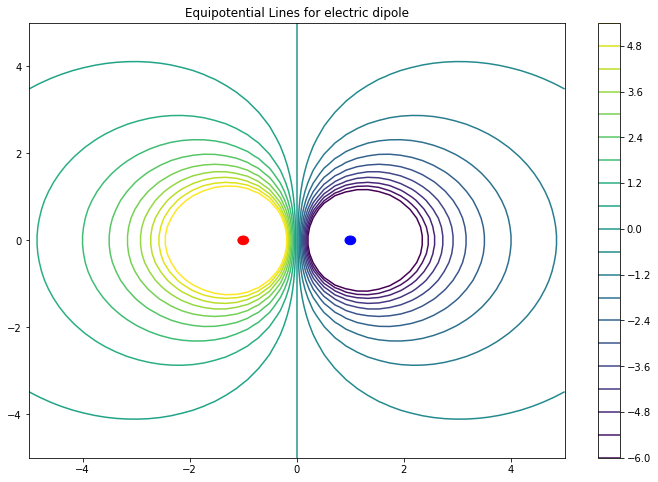

In [2]:
################################################
# Define grid of points
################################################
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x,y)

################################################
# define charges.  In this case
# it is the electric dipole where q = 1.5e-9 C
# and the charges are at [-1,0] and [1,0]
################################################
charges = [elec.PointCharge(1.5e-9,[-1,0]),elec.PointCharge(-1.5e-9,[1,0])]

################################################
# intialize electric potential routines
################################################
Vf = elec.Equipotentials(charges,X,Y)

################################################
# evaluate the potential at the grid points 
# define above
################################################
V0 = Vf.potential_grid()

################################################
# Define which potential lines to plot
################################################
scale = 1.0
M=20
vmin = -6
vmax = 6
dx = (vmax-vmin)/M
cmaprange=[(vmin+i*dx)*scale for i in range(M)]

################################################
# plot the equipotential lines and charges
################################################
CS = plt.contour(X, Y,V0,cmaprange)# V3,(np.array([-10,-5,-4,-3,-2,-1,-.8,-.6,-.4,-.2,-.1,0,.1,.2,.4,.6,.8,1,2,3,4,5,10])*1.0e9).tolist())
for charge in charges:
    charge.plot()

plt.title("Equipotential Lines for electric dipole")
cbar = plt.colorbar(CS)
plt.show()


In [3]:
################################################
# to determine the electric potential at a point. 
# in this case the origin [0,0]
################################################
print("\nelectric potential at the origin is",Vf.potential_point([0,0]),"V")

################################################
# or other points
################################################
print("\nelectric potential at [0,1] is",Vf.potential_point([0,1]),"V")

print("\nelectric potential at [1,1] is",Vf.potential_point([1,1]),"V")

print("\nelectric potential at [3,0] is",Vf.potential_point([3,0]),"V")




electric potential at the origin is 0.0 V

electric potential at [0,1] is 0.0 V

electric potential at [1,1] is -7.46261646075 V

electric potential at [3,0] is -3.375 V


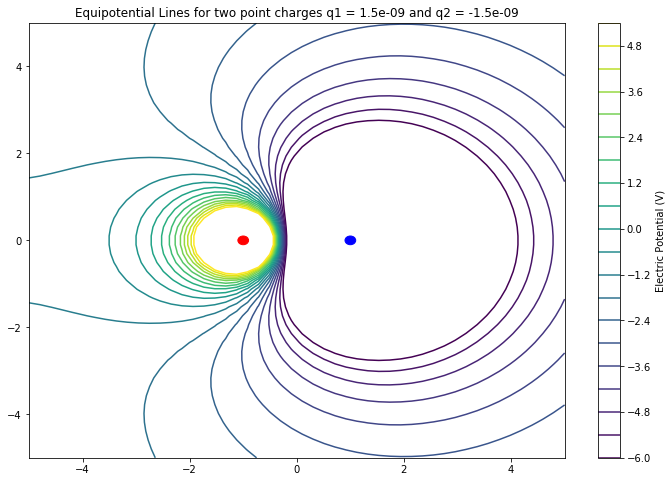

In [6]:
charges2 = [elec.PointCharge(1.5e-9,[-1,0]),elec.PointCharge(-3e-9,[1,0])]

Vf2 = elec.Equipotentials(charges2,X,Y)
V2 = Vf2.potential_grid()

CS = plt.contour(X, Y,V2,cmaprange)# V3,(np.array([-10,-5,-4,-3,-2,-1,-.8,-.6,-.4,-.2,-.1,0,.1,.2,.4,.6,.8,1,2,3,4,5,10])*1.0e9).tolist())

for charge in charges2:
    charge.plot()

plt.title("Equipotential Lines for two point charges q1 = " + str(charges[0].q) + " and q2 = " + str(charges[1].q))
cbar = plt.colorbar(CS)
cbar.set_label("Electric Potential (V)")
plt.show()

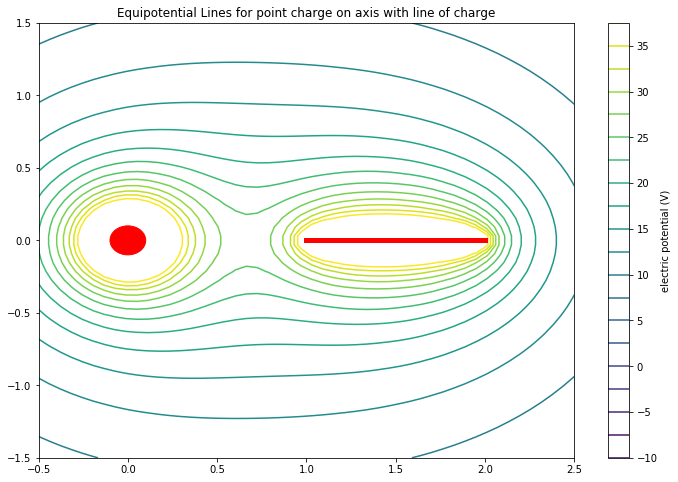

In [7]:
x = np.linspace(-.5, 2.5, 50)
y = np.linspace(-1.5, 1.5, 50)
X, Y = np.meshgrid(x,y)
charges3 = [elec.LineCharge(1.e-9,[1,0],[2,0]), elec.PointCharge(1.e-9,[0,0])]

Vf3 = elec.Equipotentials(charges3,X,Y)
V3 = Vf3.potential_grid()

scale = 1.0
M=20
vmin = -10
vmax = 40
dx = (vmax-vmin)/M
cmaprange=[(vmin+i*dx)*scale for i in range(M)]

CS = plt.contour(X, Y,V3,cmaprange)# V3,(np.array([-10,-5,-4,-3,-2,-1,-.8,-.6,-.4,-.2,-.1,0,.1,.2,.4,.6,.8,1,2,3,4,5,10])*1.0e9).tolist())

for charge in charges3:
    charge.plot()

plt.title("Equipotential Lines for point charge on axis with line of charge")
cbar = plt.colorbar(CS)
cbar.set_label("electric potential (V)")
plt.show()


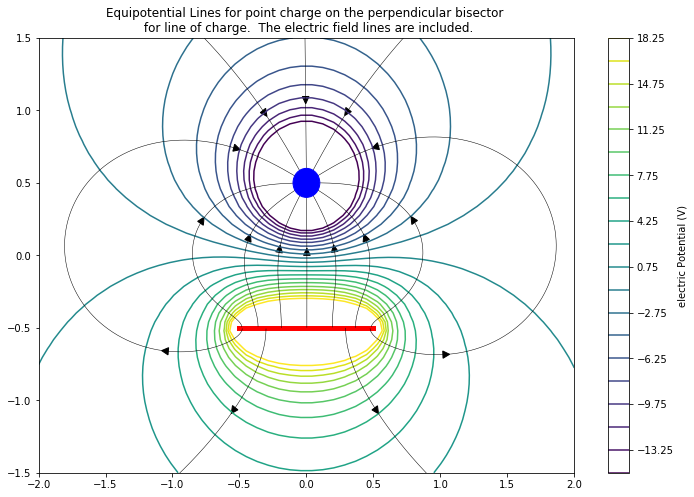

In [8]:
x = np.linspace(-2, 2, 50)
y = np.linspace(-1.5, 1.5, 50)
X, Y = np.meshgrid(x,y)
charges4 = [elec.LineCharge(1.e-9,[-.5,-.5],[.5,-.5]), elec.PointCharge(-1.e-9,[0,.5])]

Vf4 = elec.Equipotentials(charges4,X,Y)
V4 = Vf4.potential_grid()

scale = 1.0
M=20
vmin = -15
vmax = 20
dx = (vmax-vmin)/M
cmaprange=[(vmin+i*dx)*scale for i in range(M)]

CS = plt.contour(X, Y,V4,cmaprange)# V3,(np.array([-10,-5,-4,-3,-2,-1,-.8,-.6,-.4,-.2,-.1,0,.1,.2,.4,.6,.8,1,2,3,4,5,10])*1.0e9).tolist())

for charge in charges4:
    charge.plot()

plt.title("Equipotential Lines for point charge on the perpendicular bisector \n for line of charge.  The electric field lines are included.")
cbar = plt.colorbar(CS)
cbar.set_label("electric Potential (V)")

plt.ylim([-1.5,1.5])
plt.xlim([-2,2])
XMIN, XMAX = -20, 20
YMIN, YMAX = -15, 15
ZOOM = 15
XOFFSET = 0
elec.init(XMIN, XMAX, YMIN, YMAX, ZOOM, XOFFSET)

field = elec.ElectricField(charges4)
g = elec.GaussianCircle(charges4[1].x, 0.1)
fieldlines = []
for x in g.fluxpoints(field, 12):
    fieldlines.append(field.line(x))
#fieldlines.append(field.line([-10, 0]))

# Plotting
#plt.figure(figsize=(6, 4.5))
field.plot()
for fieldline in fieldlines:
    fieldline.plot(linewidth=.5)
#for charge in charges:
#ax = charge.plot()

plt.show()

In [13]:
1.0e-19*field.magnitude([0,0])

6.1399883076052776e-18